# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

## Get data

In [2]:
N1 = 10000
N2 = 10
# fixed data set
data_clf = data.get_synthetic_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


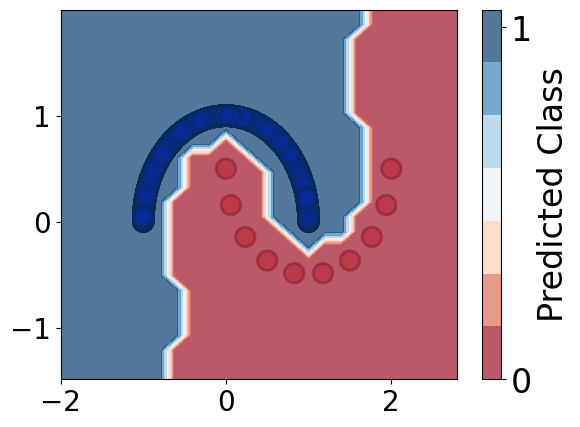

SMOTE


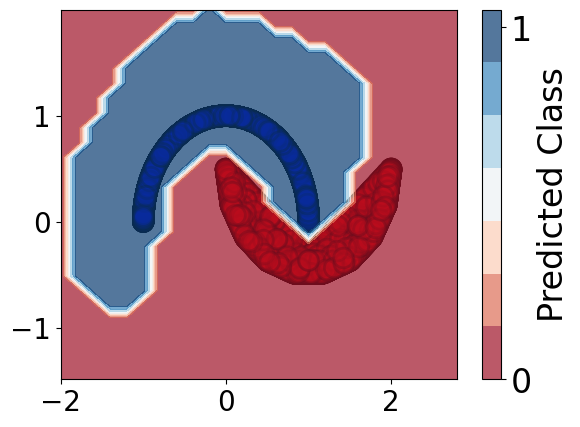

In [3]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

deltas init: [0.999999999999999, 0.9486214943167132]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.0016998399839984 
    delta2: 0.9778080551222498
    constraint satisfied: True


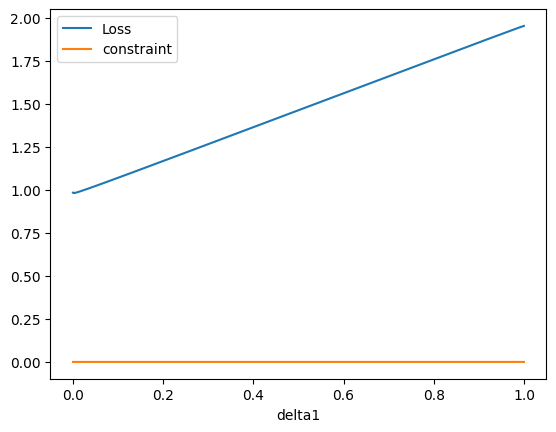

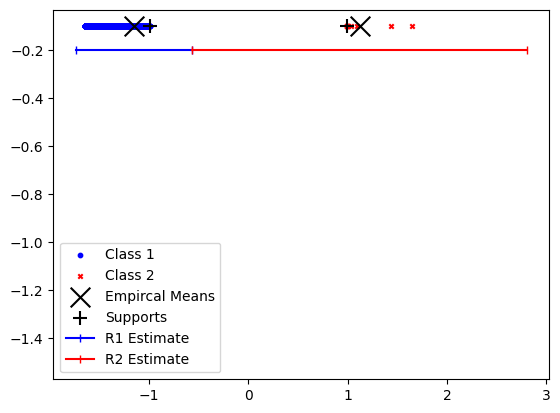

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = base.base_deltas(
    clf).fit(X, y, grid_search=True, _print=True, _plot=True)

## Plot training data information

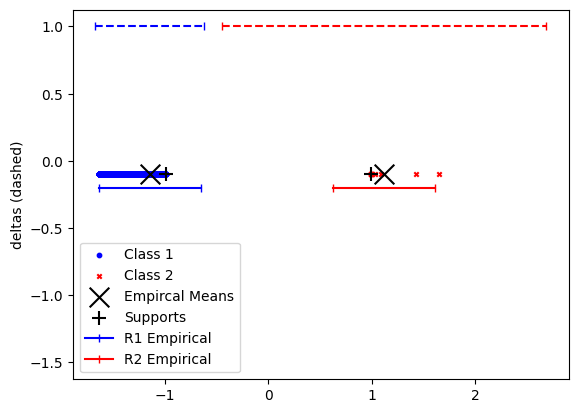

In [5]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [6]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [7]:
deltas_model.print_params()

Parameters
                R:  1.6490026702017788
                N1: 10000
                N2: 10
                R1: 0.4941012675103973
                R2: 0.5278032127485841
                M:  1.9876592740183547
                D:  2.2671723506642225
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 1.0
deltas accuracy: 1.0
SMOTE accuracy: 1.0

original F1: 1.0
deltas F1: 1.0
SMOTE F1: 1.0

original precision0: 1.0
deltas precision0: 1.0
SMOTE precision0: 1.0

original precision1: 1.0
deltas precision1: 1.0
SMOTE precision1: 1.0

original


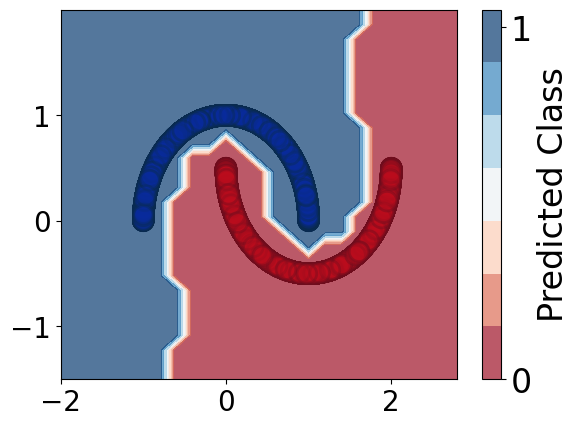

deltas


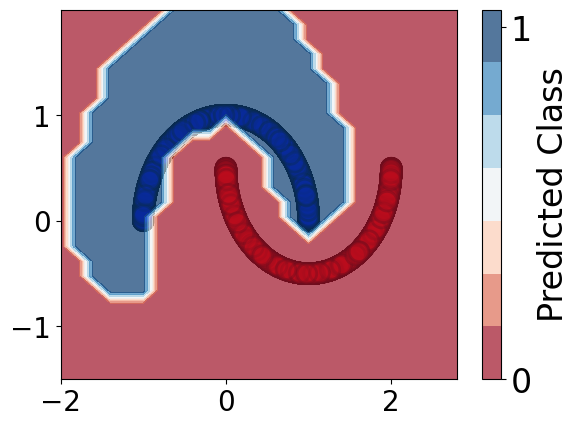

SMOTE


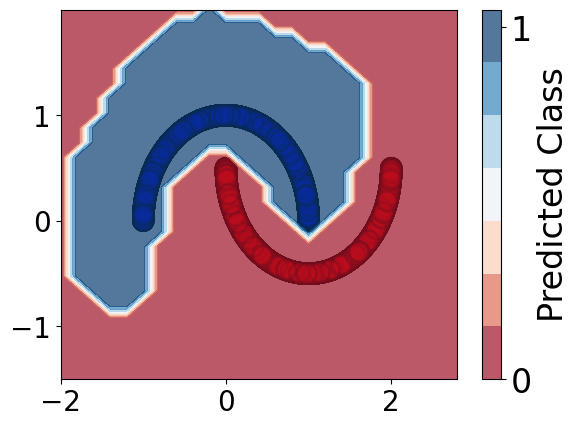

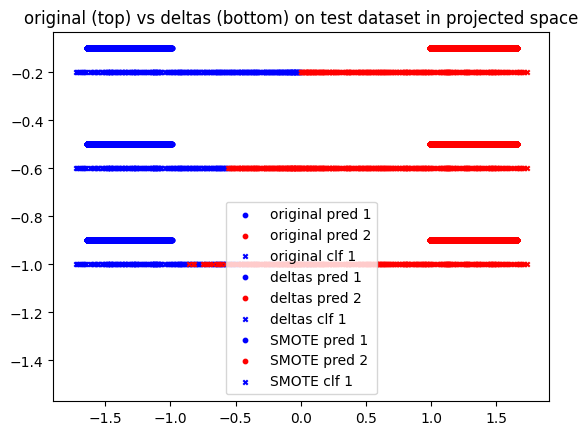

In [8]:
mdels = {
    'original': clf,
    'deltas': deltas_model,
    'SMOTE': clf_SMOTE,
         }
evaluation.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)